In [1]:
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [29]:
df = pd.read_csv('data/student_lifestyle_dataset.csv')
df.drop(columns=['Student_ID'], inplace=True)
#df.head(10)
#df.columns # kolonu vertibas
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   Stress_Level                     2000 non-null   object 
 6   Gender                           2000 non-null   object 
 7   Grades                           2000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 125.1+ KB


Varam secinat ka ar datiem ir viss kartiba un nav trukstosas vertibas

In [76]:
df["Stress_Level"] = pd.Categorical(
    df["Stress_Level"],
    categories=["Low", "Moderate", "High"],
    ordered=True
)
df["Stress_Level"] = df["Stress_Level"].astype("category")
df["Stress_Level_cat"] = df["Stress_Level"].cat.codes

df["Gender"] = df["Gender"].astype("category")
df["Gender_cat"] = df["Gender"].cat.codes
print(df.dtypes)
df.head(10)

Study_Hours_Per_Day                 float64
Extracurricular_Hours_Per_Day       float64
Sleep_Hours_Per_Day                 float64
Social_Hours_Per_Day                float64
Physical_Activity_Hours_Per_Day     float64
Stress_Level                       category
Gender                             category
Grades                              float64
Stress_Level_cat                       int8
Gender_cat                             int8
dtype: object


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades,Stress_Level_cat,Gender_cat
0,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48,1,1
1,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88,0,0
2,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68,0,1
3,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20,1,1
4,8.1,0.6,6.5,2.2,6.6,High,Male,8.78,2,1
5,6.0,2.1,8.0,0.3,7.6,Moderate,Female,7.12,1,0
6,8.0,0.7,5.3,5.7,4.3,High,Male,7.70,2,1
7,8.4,1.8,5.6,3.0,5.2,High,Male,8.00,2,1
8,5.2,3.6,6.3,4.0,4.9,Low,Male,7.05,0,1
9,7.7,0.7,9.8,4.5,1.3,Moderate,Female,6.90,1,0


Kategorisku datu parveidosana uz int8 tipa datiem prieks manipulacijam

In [77]:
print(df['Stress_Level'].value_counts())
print(df['Gender'].value_counts())

print(df['Stress_Level_cat'].value_counts())
print(df['Gender_cat'].value_counts())


Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64
Gender
Male      1016
Female     984
Name: count, dtype: int64
Stress_Level_cat
2    1029
1     674
0     297
Name: count, dtype: int64
Gender_cat
1    1016
0     984
Name: count, dtype: int64


array([[<Axes: title={'center': 'Study_Hours_Per_Day'}>,
        <Axes: title={'center': 'Extracurricular_Hours_Per_Day'}>,
        <Axes: title={'center': 'Sleep_Hours_Per_Day'}>],
       [<Axes: title={'center': 'Social_Hours_Per_Day'}>,
        <Axes: title={'center': 'Physical_Activity_Hours_Per_Day'}>,
        <Axes: title={'center': 'Grades'}>],
       [<Axes: title={'center': 'Stress_Level_cat'}>,
        <Axes: title={'center': 'Gender_cat'}>, <Axes: >]], dtype=object)

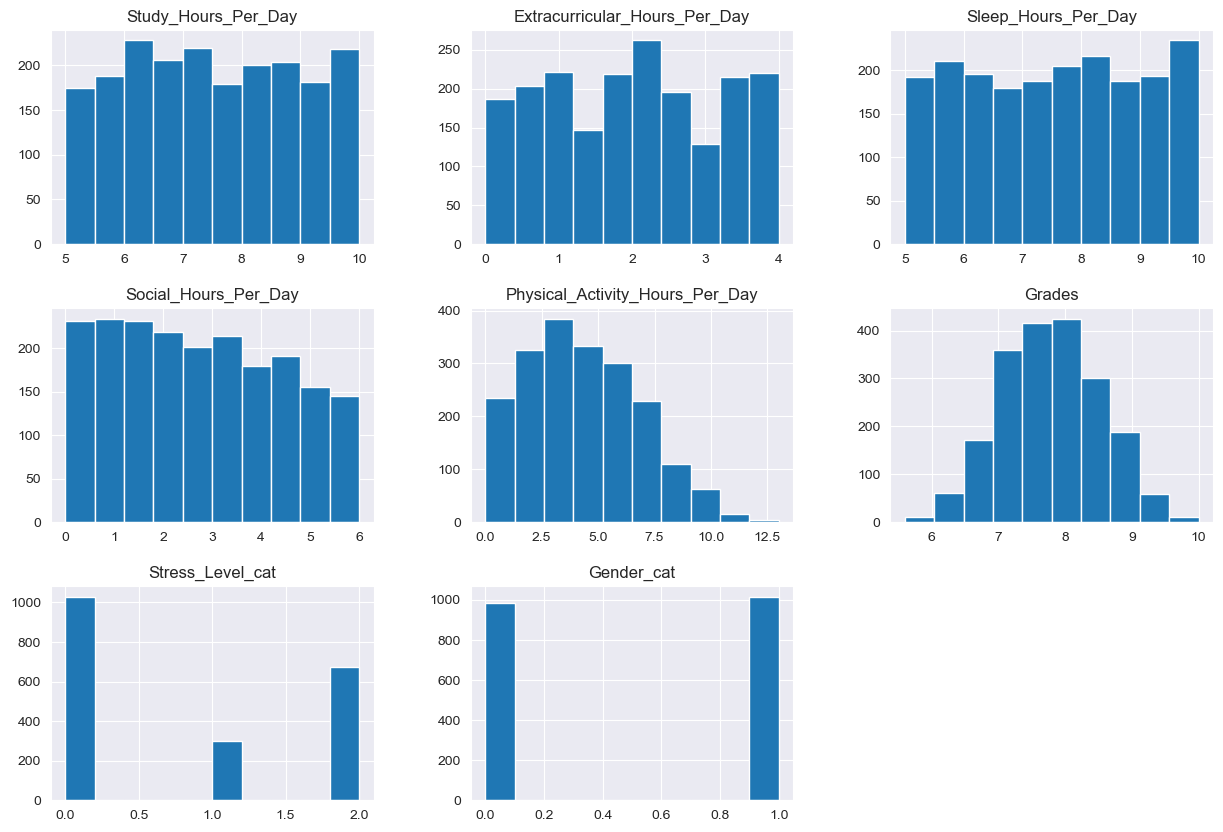

In [43]:
vizualization = df[["Study_Hours_Per_Day","Sleep_Hours_Per_Day"]]
#Vērtību attēlojuma izvade
df.hist(figsize=(15,10))

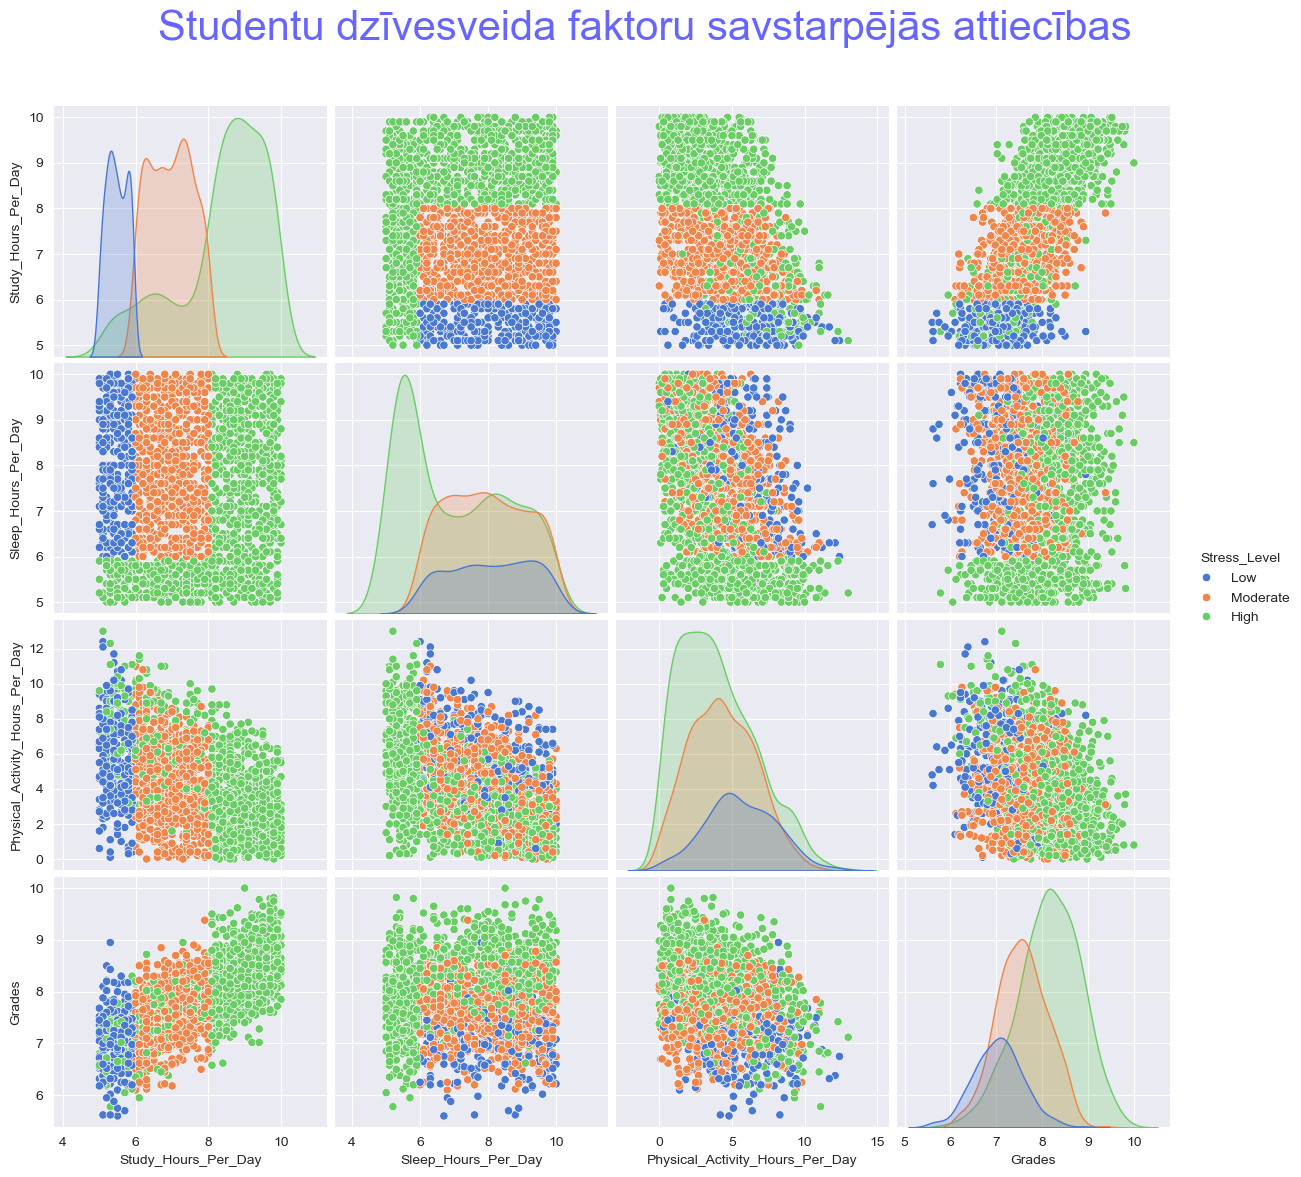

In [78]:

paru_grafiks = sns.pairplot(
    df,
    hue='Stress_Level',
    palette="muted",
    height=3,
    vars=[
        'Study_Hours_Per_Day',
        'Sleep_Hours_Per_Day',
        'Physical_Activity_Hours_Per_Day',
        'Grades'
    ],
    kind='scatter',
    diag_kind='kde'
)

plt.subplots_adjust(top=0.9)
paru_grafiks.fig.suptitle(
    'Studentu dzīvesveida faktoru savstarpējās attiecības',
    fontsize=30, color='b', alpha=0.6
)

plt.show()

chet proishodit)

<Axes: >

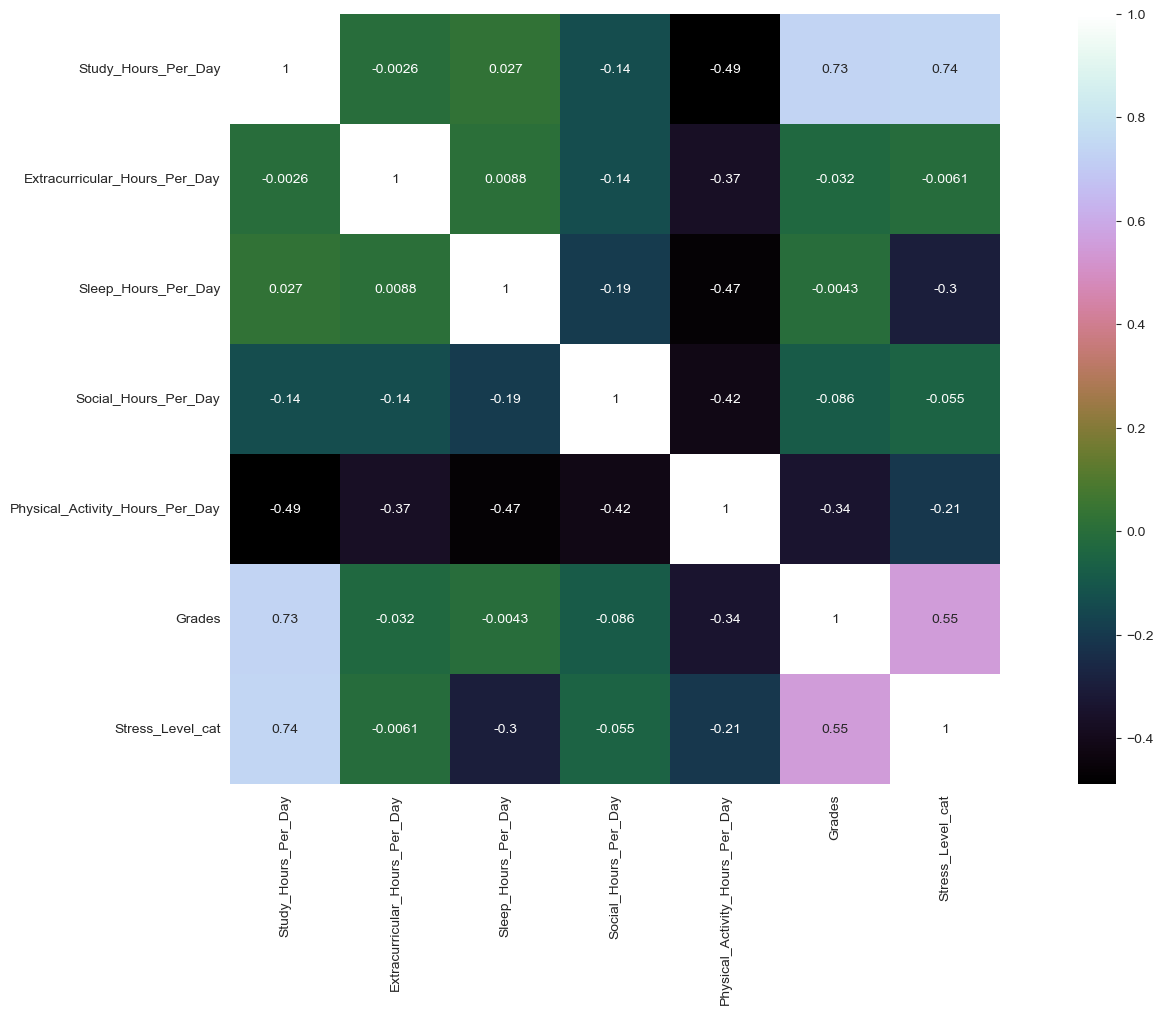

In [80]:
df_heat = df[["Study_Hours_Per_Day","Extracurricular_Hours_Per_Day","Sleep_Hours_Per_Day","Social_Hours_Per_Day","Physical_Activity_Hours_Per_Day","Grades","Stress_Level_cat"]]

df_heat_corr= df_heat.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(df_heat_corr,vmax=1,square=True,annot=True,cmap='cubehelix')



Kkads secinajums )))

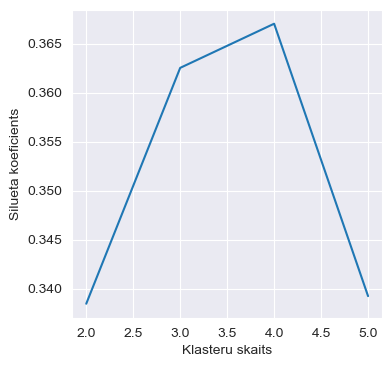

In [109]:
from sklearn.cluster import KMeans
from sklearn import metrics

df_cluster3 = df[["Study_Hours_Per_Day", "Sleep_Hours_Per_Day", "Grades"]]
Silueta_koeficients = []

for i in range(2,6):
   kmeans_model = KMeans(n_clusters = i, init = "k-means++")
   kmeans_model.fit(df_cluster3)
   Silueta_koeficients.append(metrics.silhouette_score(df_cluster3, kmeans_model.labels_))


plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silueta_koeficients)
plt.xlabel('Klasteru skaits')
plt.ylabel('Silueta koeficients')
plt.show()

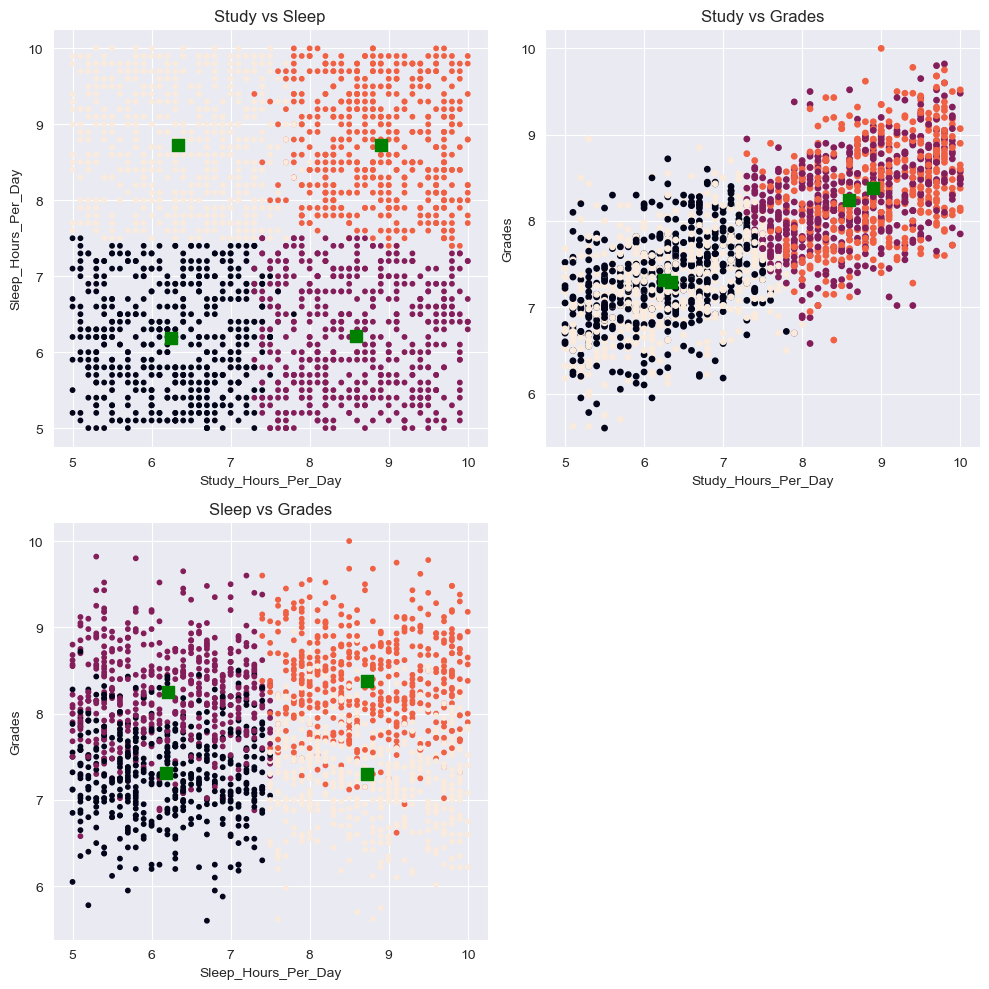

In [118]:

# Подготовка данных
df_cluster3 = df[["Study_Hours_Per_Day", "Sleep_Hours_Per_Day", "Grades"]]

# Обучение модели KMeans с 4 кластерами
kmeans_modelis = KMeans(n_clusters=4, init="k-means++", random_state=42).fit(df_cluster3)

# Центры кластеров
centroids = kmeans_modelis.cluster_centers_

# Предсказание кластеров
ypred = kmeans_modelis.predict(df_cluster3)

# Визуализация кластеров в 3 проекциях
plt.figure(figsize=(10, 10))

# 1. Study vs Sleep
plt.subplot(2, 2, 1)
plt.scatter(df_cluster3['Study_Hours_Per_Day'], df_cluster3['Sleep_Hours_Per_Day'], s=10, c=ypred)
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, c='g', marker='s')
plt.xlabel('Study_Hours_Per_Day')
plt.ylabel('Sleep_Hours_Per_Day')
plt.title('Study vs Sleep')

# 2. Study vs Grades
plt.subplot(2, 2, 2)
plt.scatter(df_cluster3['Study_Hours_Per_Day'], df_cluster3['Grades'], s=15, c=ypred)
plt.scatter(centroids[:, 0], centroids[:, 2], s=80, c='g', marker='s')
plt.xlabel('Study_Hours_Per_Day')
plt.ylabel('Grades')
plt.title('Study vs Grades')

# 3. Sleep vs Grades
plt.subplot(2, 2, 3)
plt.scatter(df_cluster3['Sleep_Hours_Per_Day'], df_cluster3['Grades'], s=10, c=ypred)
plt.scatter(centroids[:, 1], centroids[:, 2], s=80, c='g', marker='s')
plt.xlabel('Sleep_Hours_Per_Day')
plt.ylabel('Grades')
plt.title('Sleep vs Grades')

plt.tight_layout()
plt.show()

INFA

In [119]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.cluster import AgglomerativeClustering
#algoritma modeļa izveide, par pamatu izmantojot datu apakškopu ar 3 atribūtiem
clustering = AgglomerativeClustering().fit(df_cluster3)

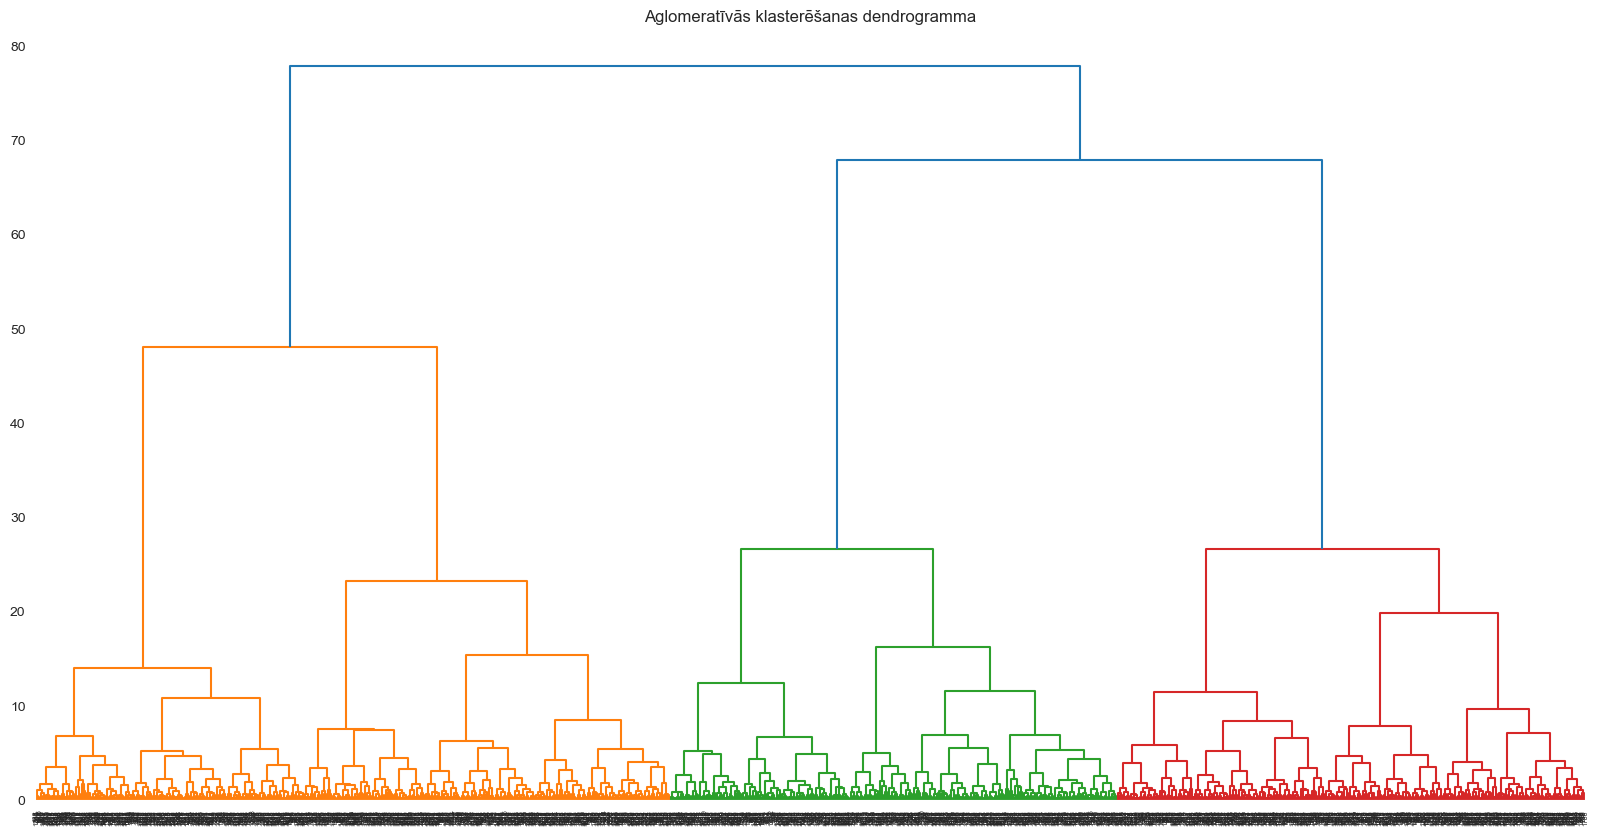

In [122]:
#dendrogrammas atspoguļošanai nepieciešamās bibliotēkas ielāde
import scipy.cluster.hierarchy as shc
#dendrogrammas izvade, par pamatu izmantojot saistīšanas metodi "ward"
plt.figure(figsize =(20, 10))
plt.title('Aglomeratīvās klasterēšanas dendrogramma')
Dendrogram = shc.dendrogram((shc.linkage(df_cluster3, method ='ward')))

In [133]:
#bibliotēkas ielāde datu sadalīšanai apmācības un testa datu kopās
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#atsevišķajā mainīgajā saglabājam datu objektu izeju vērtības, t.i. "pingvīnu sugas"
izejas = df['Stress_Level_cat']
#uzdodam datu objektu proporciju, kuri veidos apmācības datu kopu (70%)
apmacibas_datu_proporcija = 0.7
#tiek veikta datu kopas sadalīšana testa un apmācības kopā, izmantojot nejaušu sadalījumu ar attecību 70:30
X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(df_cluster3, izejas, test_size=1.0 - apmacibas_datu_proporcija, random_state=42)



In [151]:
#izveidojam mākslīgo neironu tīkla modeli ar 2 slāņiem, katrā no kuriem ir 100 neironi
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 1000, aktivizācijas funkcija ir loģistiskā,
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.1 un apmācības iterāciju izvade
neironu_tikla_modelis = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)

#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis.fit(X_apmacibas, y_apmacibas)

Iteration 1, loss = 1.00505153
Iteration 2, loss = 0.99860374
Iteration 3, loss = 1.01691790
Iteration 4, loss = 0.97132633
Iteration 5, loss = 0.95714137
Iteration 6, loss = 0.88705681
Iteration 7, loss = 0.81502124
Iteration 8, loss = 0.72068514
Iteration 9, loss = 0.66043418
Iteration 10, loss = 0.67284815
Iteration 11, loss = 0.58986460
Iteration 12, loss = 0.56204376
Iteration 13, loss = 0.52349113
Iteration 14, loss = 0.53739776
Iteration 15, loss = 0.54727156
Iteration 16, loss = 0.51038312
Iteration 17, loss = 0.52215963
Iteration 18, loss = 0.50049286
Iteration 19, loss = 0.54909958
Iteration 20, loss = 0.53688589
Iteration 21, loss = 0.47787972
Iteration 22, loss = 0.49311642
Iteration 23, loss = 0.46574186
Iteration 24, loss = 0.48803081
Iteration 25, loss = 0.49699483
Iteration 26, loss = 0.46790999
Iteration 27, loss = 0.48782851
Iteration 28, loss = 0.45169453
Iteration 29, loss = 0.43067517
Iteration 30, loss = 0.40451773
Iteration 31, loss = 0.42036387
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.97      0.61      0.75        96
           1       0.80      0.88      0.84       188
           2       0.93      0.98      0.95       317

    accuracy                           0.89       601
   macro avg       0.90      0.82      0.85       601
weighted avg       0.89      0.89      0.88       601



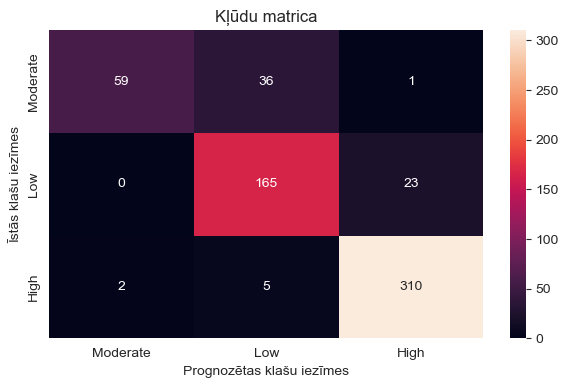

In [152]:
#bibliotēku pievienošana algoritma veikuma novērtēšanai un izvadei
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb

#izmantojam apmācīto modeli ar testa kopu, lai iegūtu prognozes
y_prognoze = neironu_tikla_modelis.predict(X_testa)

#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze, zero_division=0))

#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze)

#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(df['Stress_Level'].unique());
ax.yaxis.set_ticklabels(df['Stress_Level'].unique());